<a href="https://colab.research.google.com/github/Olufems/Datathon23/blob/main/EDA_%26_Feature_Engineering_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assessing Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
ls

drive/  sample_data/


In [3]:
cd 'drive/My Drive'

/content/drive/My Drive


In [4]:
cd '/content/drive/MyDrive/DatafestAfrica/'

/content/drive/MyDrive/DatafestAfrica


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,6)})
pd.set_option('display.max_columns', 50)
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

In [6]:
df = pd.read_csv('/content/drive/MyDrive/DatafestAfrica/FraudDetectionDataset1.csv')

In [7]:
df.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Income,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,Links,Tizen,Industrial & Scientific,68,Doctor,66826.21,Prefer Not to Say,Pro,In Transit,9.34,24.22,Daytime,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,Beaker,Windows Server,Beauty & Cosmetics,22,Chemist,89356.71,Genderqueer,Pending Approval,Resolved,65.28,55.11,Daytime,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,Opera,Android,Real Estate,71,Nurse,58438.63,Male,Pro,Posted,44.05,53.84,Daytime,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,Konqueror,CentOS,Appliances,78,Nurse,3426.92,Agender,Premium,Closed,21.70,21.62,Daytime,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,Basilisk,Ubuntu,Jewelry,31,Physicist,53080.12,Male,Free,Refunded,56.63,53.71,Daytime,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1


In [8]:
# Checking the size of the data
print(f"This dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

This dataset contains 6000000 rows and 32 columns


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 32 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Transaction ID                     int64  
 1   User ID                            int64  
 2   Transaction Amount                 float64
 3   Transaction Date and Time          object 
 4   Merchant ID                        int64  
 5   Payment Method                     object 
 6   Country Code                       object 
 7   Transaction Type                   object 
 8   Device Type                        object 
 9   IP Address                         object 
 10  Browser Type                       object 
 11  Operating System                   object 
 12  Merchant Category                  object 
 13  User Age                           int64  
 14  User Occupation                    object 
 15  User Income                        float64
 16  User Gender       

In [10]:
# Convert Transaction Date and Time column to datetime data type
df["Transaction Date and Time"] = pd.to_datetime(df["Transaction Date and Time"])

In [11]:
# Checking the feature types
print(f"This dataset contains {df.select_dtypes(include=['object']).shape[1]} categorical features and {df.select_dtypes(include=['int', 'float']).shape[1]} numerical features")

This dataset contains 18 categorical features and 13 numerical features


In [12]:
# Summary Statistics
df.describe(include='all')

<ipython-input-12-e0c513a4baef>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Income,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
count,6.000000e+06,6.000000e+06,6.000000e+06,6000000,6.000000e+06,6000000,6000000,6000000,6000000,6000000,6000000,6000000,6000000,6.000000e+06,6000000,6.000000e+06,6000000,6000000,6000000,6.000000e+06,6.000000e+06,6000000,6.000000e+06,6.000000e+06,6000000,6000000,6000000,6.000000e+06,6000000,6.000000e+06,6000000,6.000000e+06
unique,NaN,NaN,NaN,5783314,NaN,40,40,38,38,5995699,39,40,40,NaN,26,NaN,7,18,40,NaN,NaN,3,NaN,NaN,40,40,38,NaN,40,NaN,39,NaN
top,NaN,NaN,NaN,2021-03-13 20:34:16,NaN,Amazon Pay,HKG,Refund,Smart TV,189.94.101.16,Qutebrowser,Debian,Electronics,NaN,Salesperson,NaN,Male,Trial,In Progress,NaN,NaN,Nighttime,NaN,NaN,United States,ZAR,Invoice Payment,NaN,roadrunner.co.uk,NaN,Geolocation Verification,NaN
freq,NaN,NaN,NaN,5,NaN,150781,150917,300214,158697,3,300231,150732,150636,NaN,231511,NaN,858298,334960,151049,NaN,NaN,2001180,NaN,NaN,150845,150722,158411,NaN,150776,NaN,154728,NaN
first,NaN,NaN,NaN,2021-01-01 00:00:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2023-07-30 23:59:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.501906e+07,5.499571e+03,5.005515e+02,NaN,5.500817e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.900159e+01,NaN,5.049328e+04,NaN,NaN,NaN,5.050600e+01,3.049492e+01,NaN,5.048393e+01,2.999382e+00,NaN,NaN,NaN,5.749533e+02,NaN,1.049685e+01,NaN,4.999843e-01
std,2.598067e+07,2.598744e+03,2.884166e+02,NaN,2.598350e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.818538e+01,NaN,2.858223e+04,NaN,NaN,NaN,2.857562e+01,1.703567e+01,NaN,2.886705e+01,1.154479e+00,NaN,NaN,NaN,1.590197e+02,NaN,5.764884e+00,NaN,5.000000e-01
min,1.000004e+07,1.000000e+03,1.000000e+00,NaN,1.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.800000e+01,NaN,1.000020e+03,NaN,NaN,NaN,1.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00,NaN,NaN,NaN,3.000000e+02,NaN,1.000000e+00,NaN,0.000000e+00
25%,3.251666e+07,3.248000e+03,2.507900e+02,NaN,3.251000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.300000e+01,NaN,2.573446e+04,NaN,NaN,NaN,2.576000e+01,1.574000e+01,NaN,2.500000e+01,2.000000e+00,NaN,NaN,NaN,4.370000e+02,NaN,5.000000e+00,NaN,0.000000e+00


In [13]:
# Check duplicated rows
df.duplicated().sum()

0

0    50.001567
1    49.998433
Name: Fraudulent Flag, dtype: float64


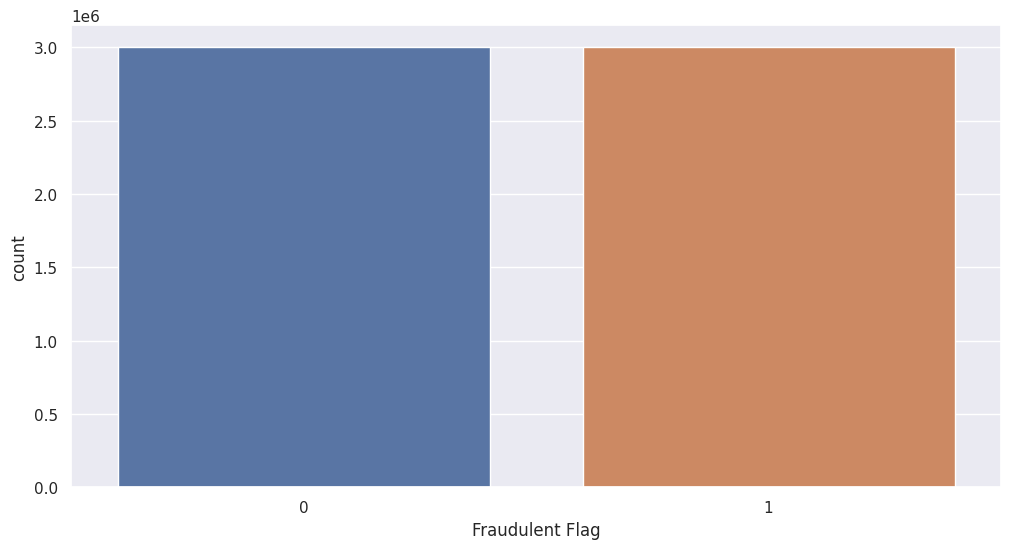

In [14]:
# Checking distribution of target Column
print(df["Fraudulent Flag"].value_counts(normalize=True) * 100)
sns.countplot(df, x="Fraudulent Flag");

In [15]:
# Checking cardinality of individual columns
df.nunique()

Transaction ID                       5805013
User ID                                 9000
Transaction Amount                     99901
Transaction Date and Time            5783314
Merchant ID                             9000
Payment Method                            40
Country Code                              40
Transaction Type                          38
Device Type                               38
IP Address                           5995699
Browser Type                              39
Operating System                          40
Merchant Category                         40
User Age                                  63
User Occupation                           26
User Income                          4498549
User Gender                                7
User Account Status                       18
Transaction Status                        40
Location Distance                       9901
Time Taken for Transaction              5901
Transaction Time of Day                    3
User's Tra

In [16]:
df["Transaction Status"].unique()

array(['In Transit', 'Resolved', 'Posted', 'Closed', 'Refunded',
       'Approved', 'Cancelled', 'Partially Declined', 'Void', 'Sent',
       'Cleared', 'Processing', 'Disputed', 'Transferred', 'In Progress',
       'Debit', 'Rejected', 'Unverified', 'Held for Security',
       'Pending Review', 'Authorized', 'Executed', 'Error',
       'Awaiting Verification', 'Pending', 'Pending Payment', 'Blocked',
       'Settled', 'Pending Confirmation', 'Failed', 'Credited',
       'Received', 'Partially Approved', 'Delivered', 'Processed', 'Hold',
       'Verified', 'Declined', 'Under Review', 'Completed'], dtype=object)

In [17]:
# Coverting all transaction currency to USD
exchange_rates = {'NOK': 0.09259, 'EGP': 0.03228, 'MXN': 0.05851,  'CLP': 0.00113,  'RUB': 0.01033,
                  'BRL': 0.20542, 'AUD': 0.64295,  'HKD': 0.12777, 'THB': 0.02786, 'KRW': 0.00075,
                  'RON': 0.21428, 'CAD':0.73921, 'USD':1, 'QAR':0.27457, 'GBP': 1.2382, 'PLN': 0.22935,
                  'CNY': 0.13742, 'COP': 0.00025,'TRY': 0.03703, 'SEK': 0.08932, 'SAR': 0.26632,
                  'ILS': 0.26228, 'PEN': 0.26784, 'DKK': 0.14288, 'NZD': 0.58983, 'VND': 0.00004,
                  'EUR': 1.0657,'MYR': 0.2134, 'AED': 0.27224, 'CZK': 0.04338, 'CHF': 1.11381,
                  'ARS': 0.00286, 'HUF': 0.00277, 'PHP': 0.01759, 'IDN': 0.00007, 'ZAR': 0.05267,
                  'SGD': 0.73289, 'KES':0.00676, 'INR':0.01203, 'JPY': 0.00676}

# Merge exchange rates based on currency code
df['Exchange Rate'] = df['Transaction Currency'].map(exchange_rates)

# Convert transaction amount to USD (or your desired currency)
df['Transaction Amount (USD)'] = df['Transaction Amount'] * df['Exchange Rate']
df['User Income (USD)'] = df['User Income'] * df['Exchange Rate']

# Drop the columns that are no longer needed
df.drop(['Exchange Rate', 'Transaction Amount', 'User Income'], axis=1, inplace=True)

df.head()

,Transaction ID,User ID,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag,Transaction Amount (USD),User Income (USD)
0,51595306,9822,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,Links,Tizen,Industrial & Scientific,68,Doctor,Prefer Not to Say,Pro,In Transit,9.34,24.22,Daytime,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0,15.099577,6187.438784
1,85052974,4698,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,Beaker,Windows Server,Beauty & Cosmetics,22,Chemist,Genderqueer,Pending Approval,Resolved,65.28,55.11,Daytime,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1,13.904287,2884.434599
2,23954324,8666,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,Opera,Android,Real Estate,71,Nurse,Male,Pro,Posted,44.05,53.84,Daytime,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1,24.324947,3419.244241
3,44108303,9012,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,Konqueror,CentOS,Appliances,78,Nurse,Agender,Premium,Closed,21.70,21.62,Daytime,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1,0.639456,3.872420
4,66622683,5185,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,Basilisk,Ubuntu,Jewelry,31,Physicist,Male,Free,Refunded,56.63,53.71,Daytime,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1,9.870212,548.317640


## Univariate Analysis

#### Categorical Variables

In [18]:
# Get categoral varible with unique values less than or equal to 40
cat_df = df.select_dtypes(include=['object'])
unique_df = cat_df.nunique()
selected_columns = unique_df[unique_df <= 40]
cat_df_below_40 = df[selected_columns.index]

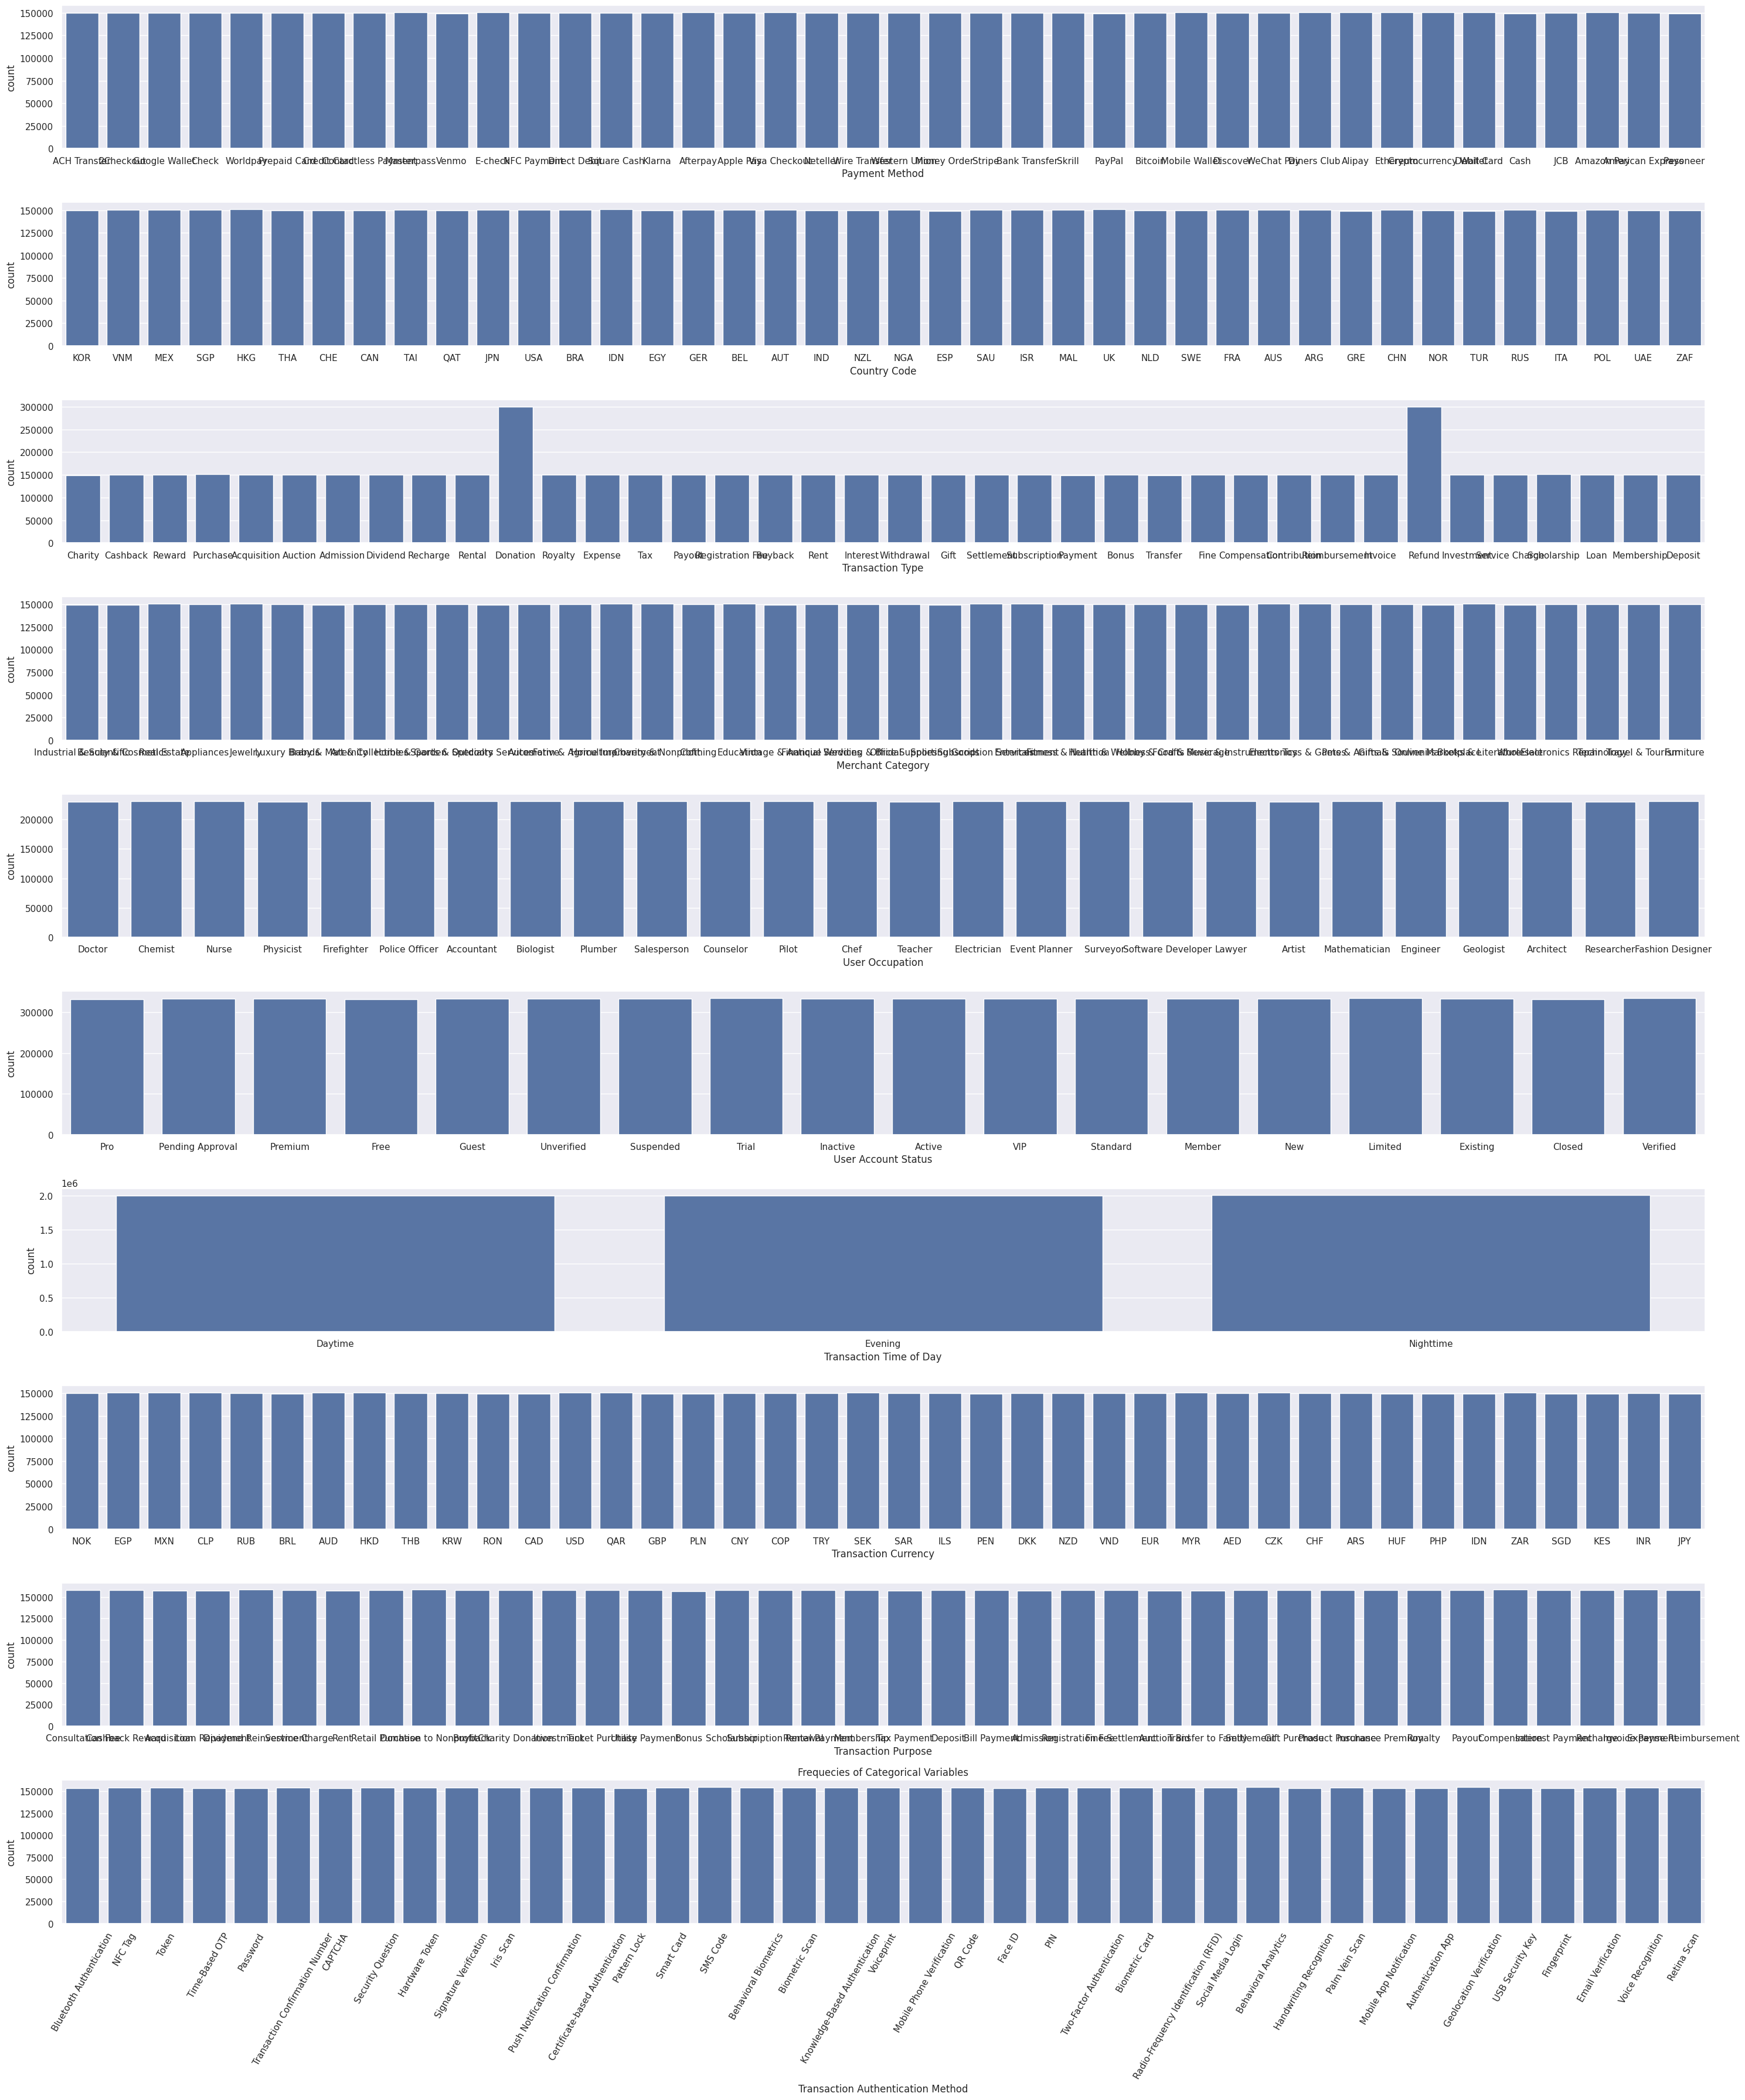

In [19]:
# Create subplots for each column
fig, ax = plt.subplots(nrows=10, figsize=[30, 36])

# Iterate through selected columns and create a count plot for each
sns.countplot(data=cat_df, x='Payment Method', color=sns.color_palette()[0], ax=ax[0])
sns.countplot(data=cat_df, x='Country Code', color=sns.color_palette()[0], ax=ax[1])
sns.countplot(data=cat_df, x='Transaction Type', color=sns.color_palette()[0], ax=ax[2])
sns.countplot(data=cat_df, x='Merchant Category', color=sns.color_palette()[0], ax=ax[3])
sns.countplot(data=cat_df, x='User Occupation', color=sns.color_palette()[0], ax=ax[4])
sns.countplot(data=cat_df, x='User Account Status', color=sns.color_palette()[0], ax=ax[5])
sns.countplot(data=cat_df, x='Transaction Time of Day', color=sns.color_palette()[0], ax=ax[6])
sns.countplot(data=cat_df, x='Transaction Currency', color=sns.color_palette()[0],  ax=ax[7])
sns.countplot(data=cat_df, x='Transaction Purpose', color=sns.color_palette()[0], ax=ax[8])
sns.countplot(data=cat_df, x='Transaction Authentication Method', color=sns.color_palette()[0], ax=ax[9])
plt.title('Frequecies of Categorical Variables')
plt.xticks(rotation=60)
plt.tight_layout();

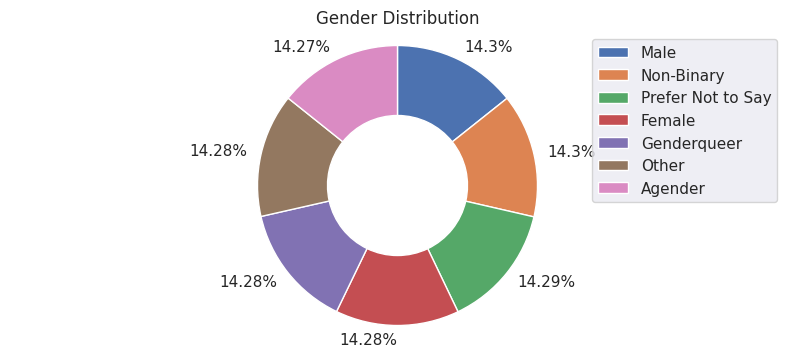

In [20]:
# Plot of Gender distribution
gendercount = round(cat_df['User Gender'].value_counts(normalize=True)*100,2)
plt.figure(figsize=(10, 4))
plt.pie(gendercount, labels=[f"{str(x)}%" for x in gendercount.values], startangle=90, counterclock = False, wedgeprops = {'width': 0.5});

plt.title('Gender Distribution', fontsize=12)
plt.legend(gendercount.index, loc='upper right')
plt.axis('equal');

#### Numerical Variable

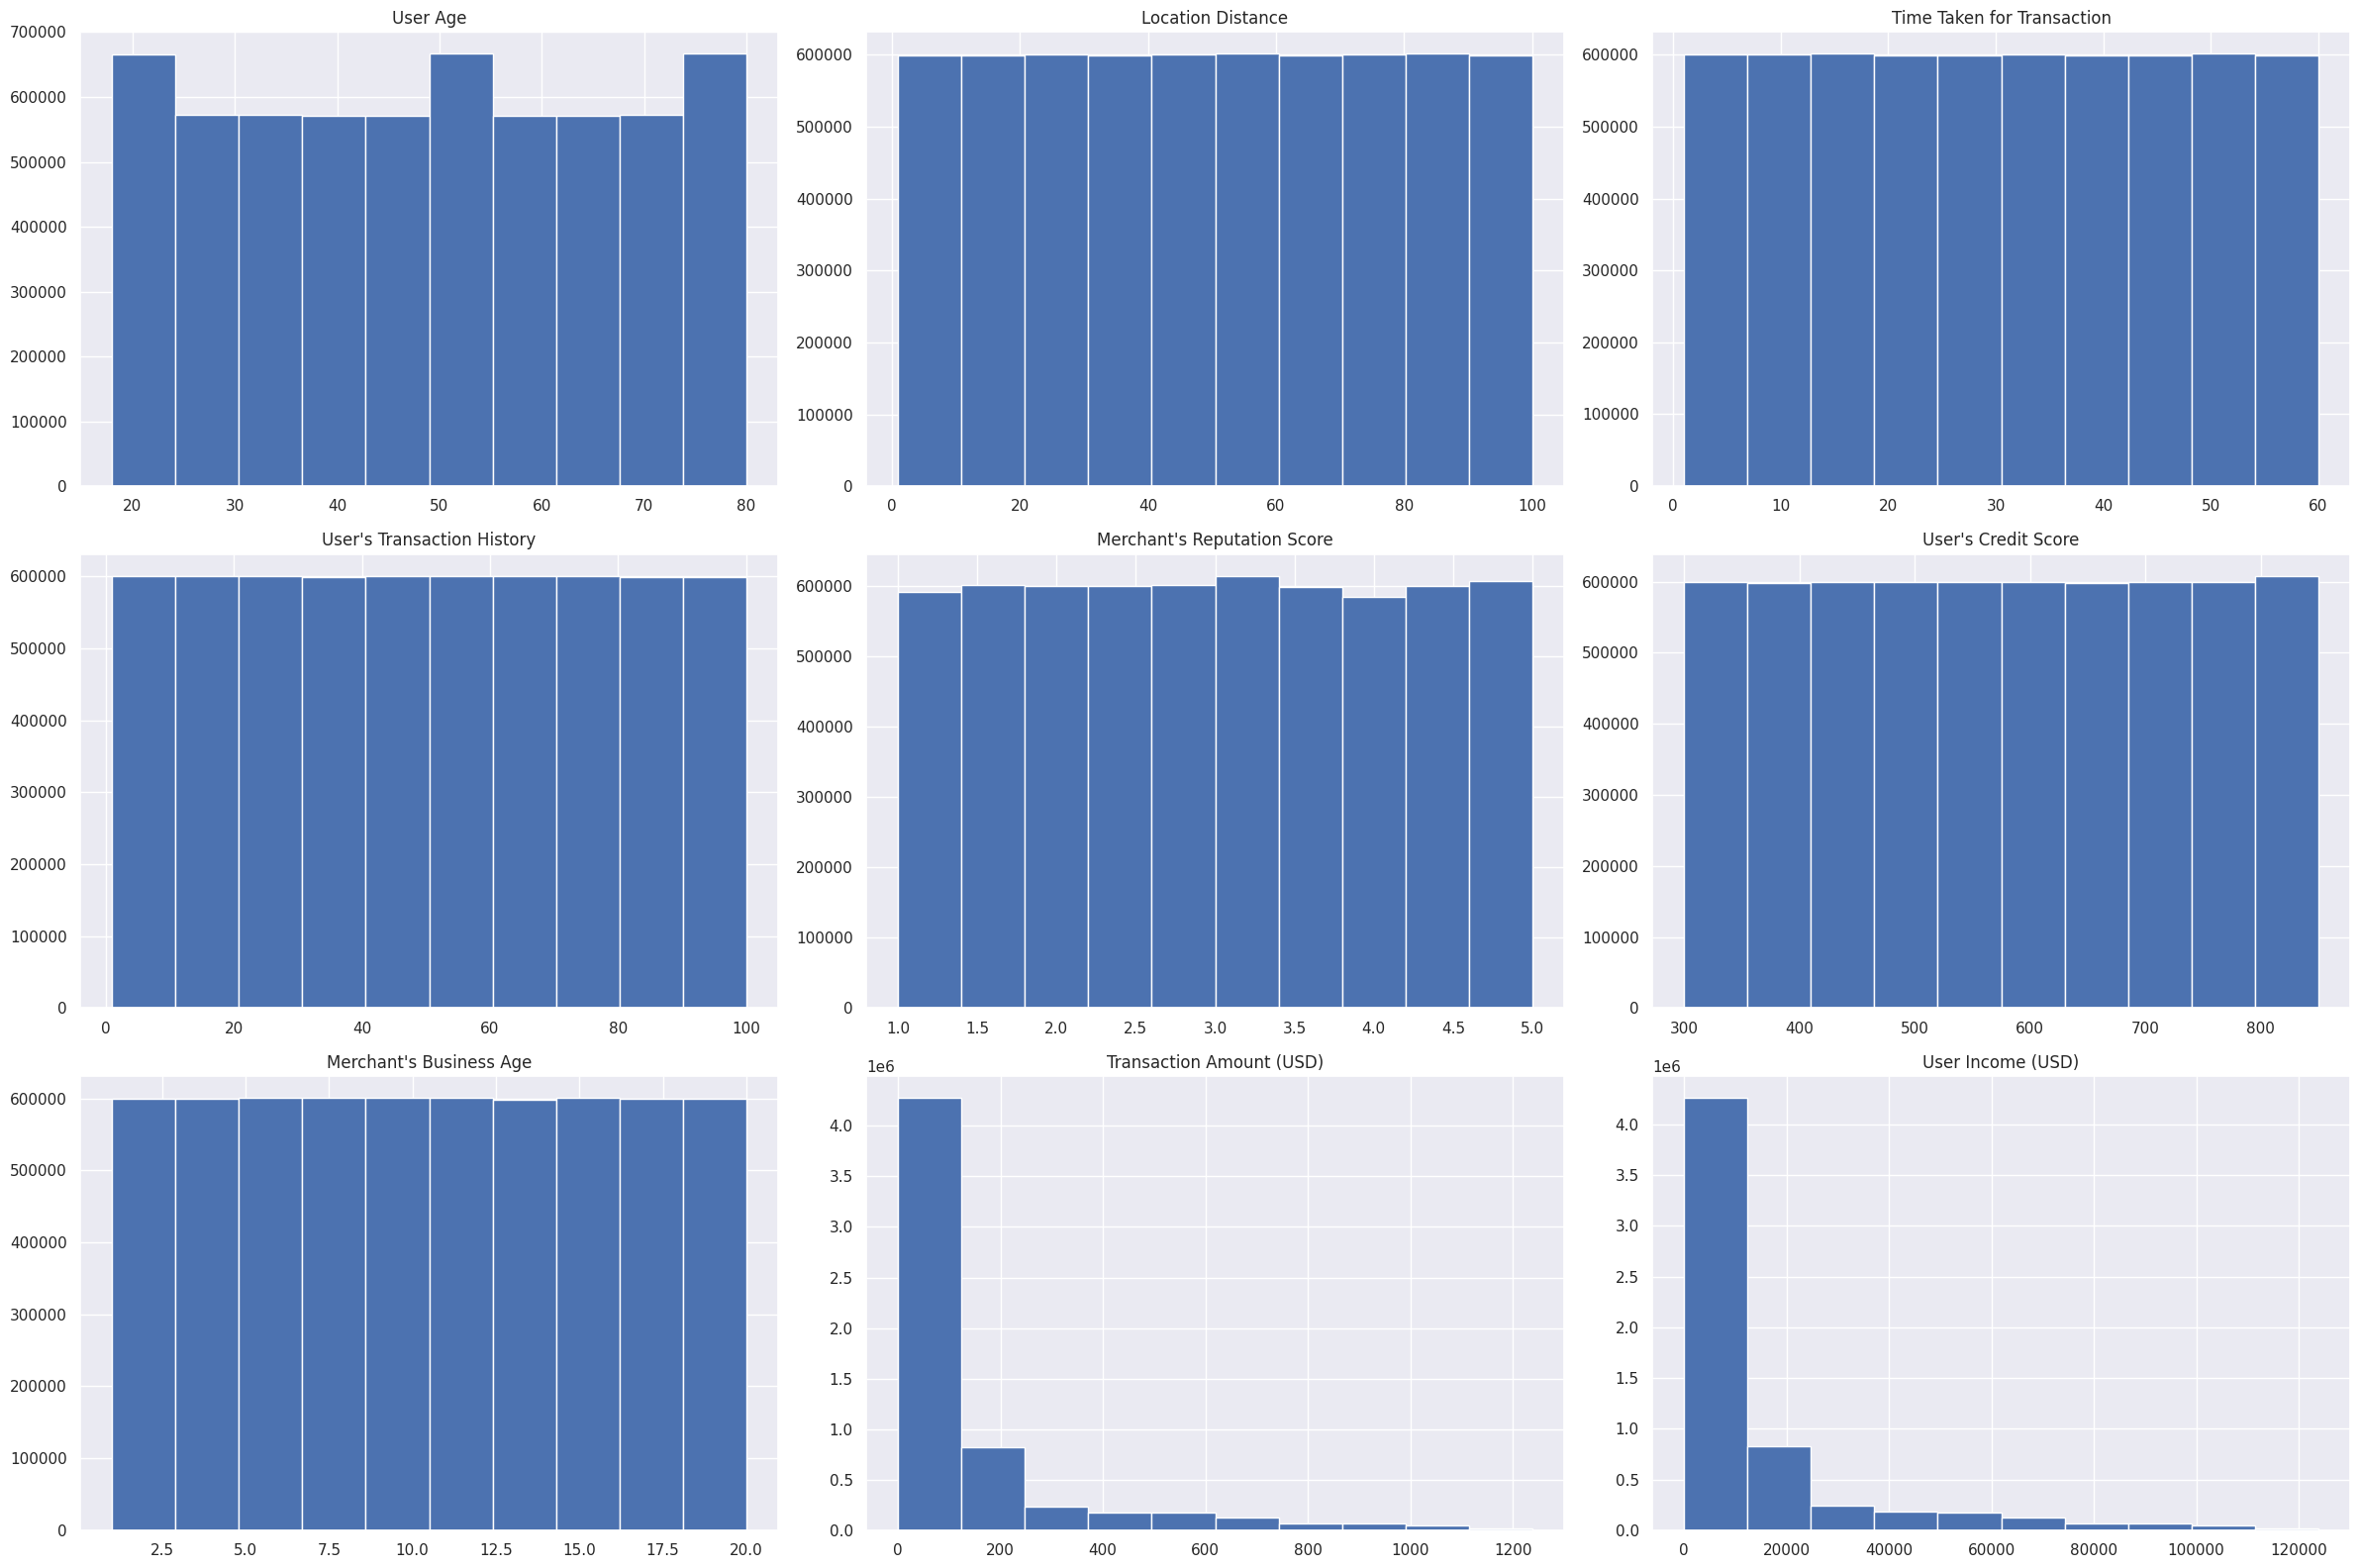

In [21]:
# Get numerical columns
numerical_df = df.select_dtypes(include=['int', 'float']).drop(columns=['Transaction ID', 'User ID','Merchant ID','Fraudulent Flag'])
numerical_df.hist(figsize=(24,16))
plt.tight_layout();

## Bivariate Analysis

#### Categorical

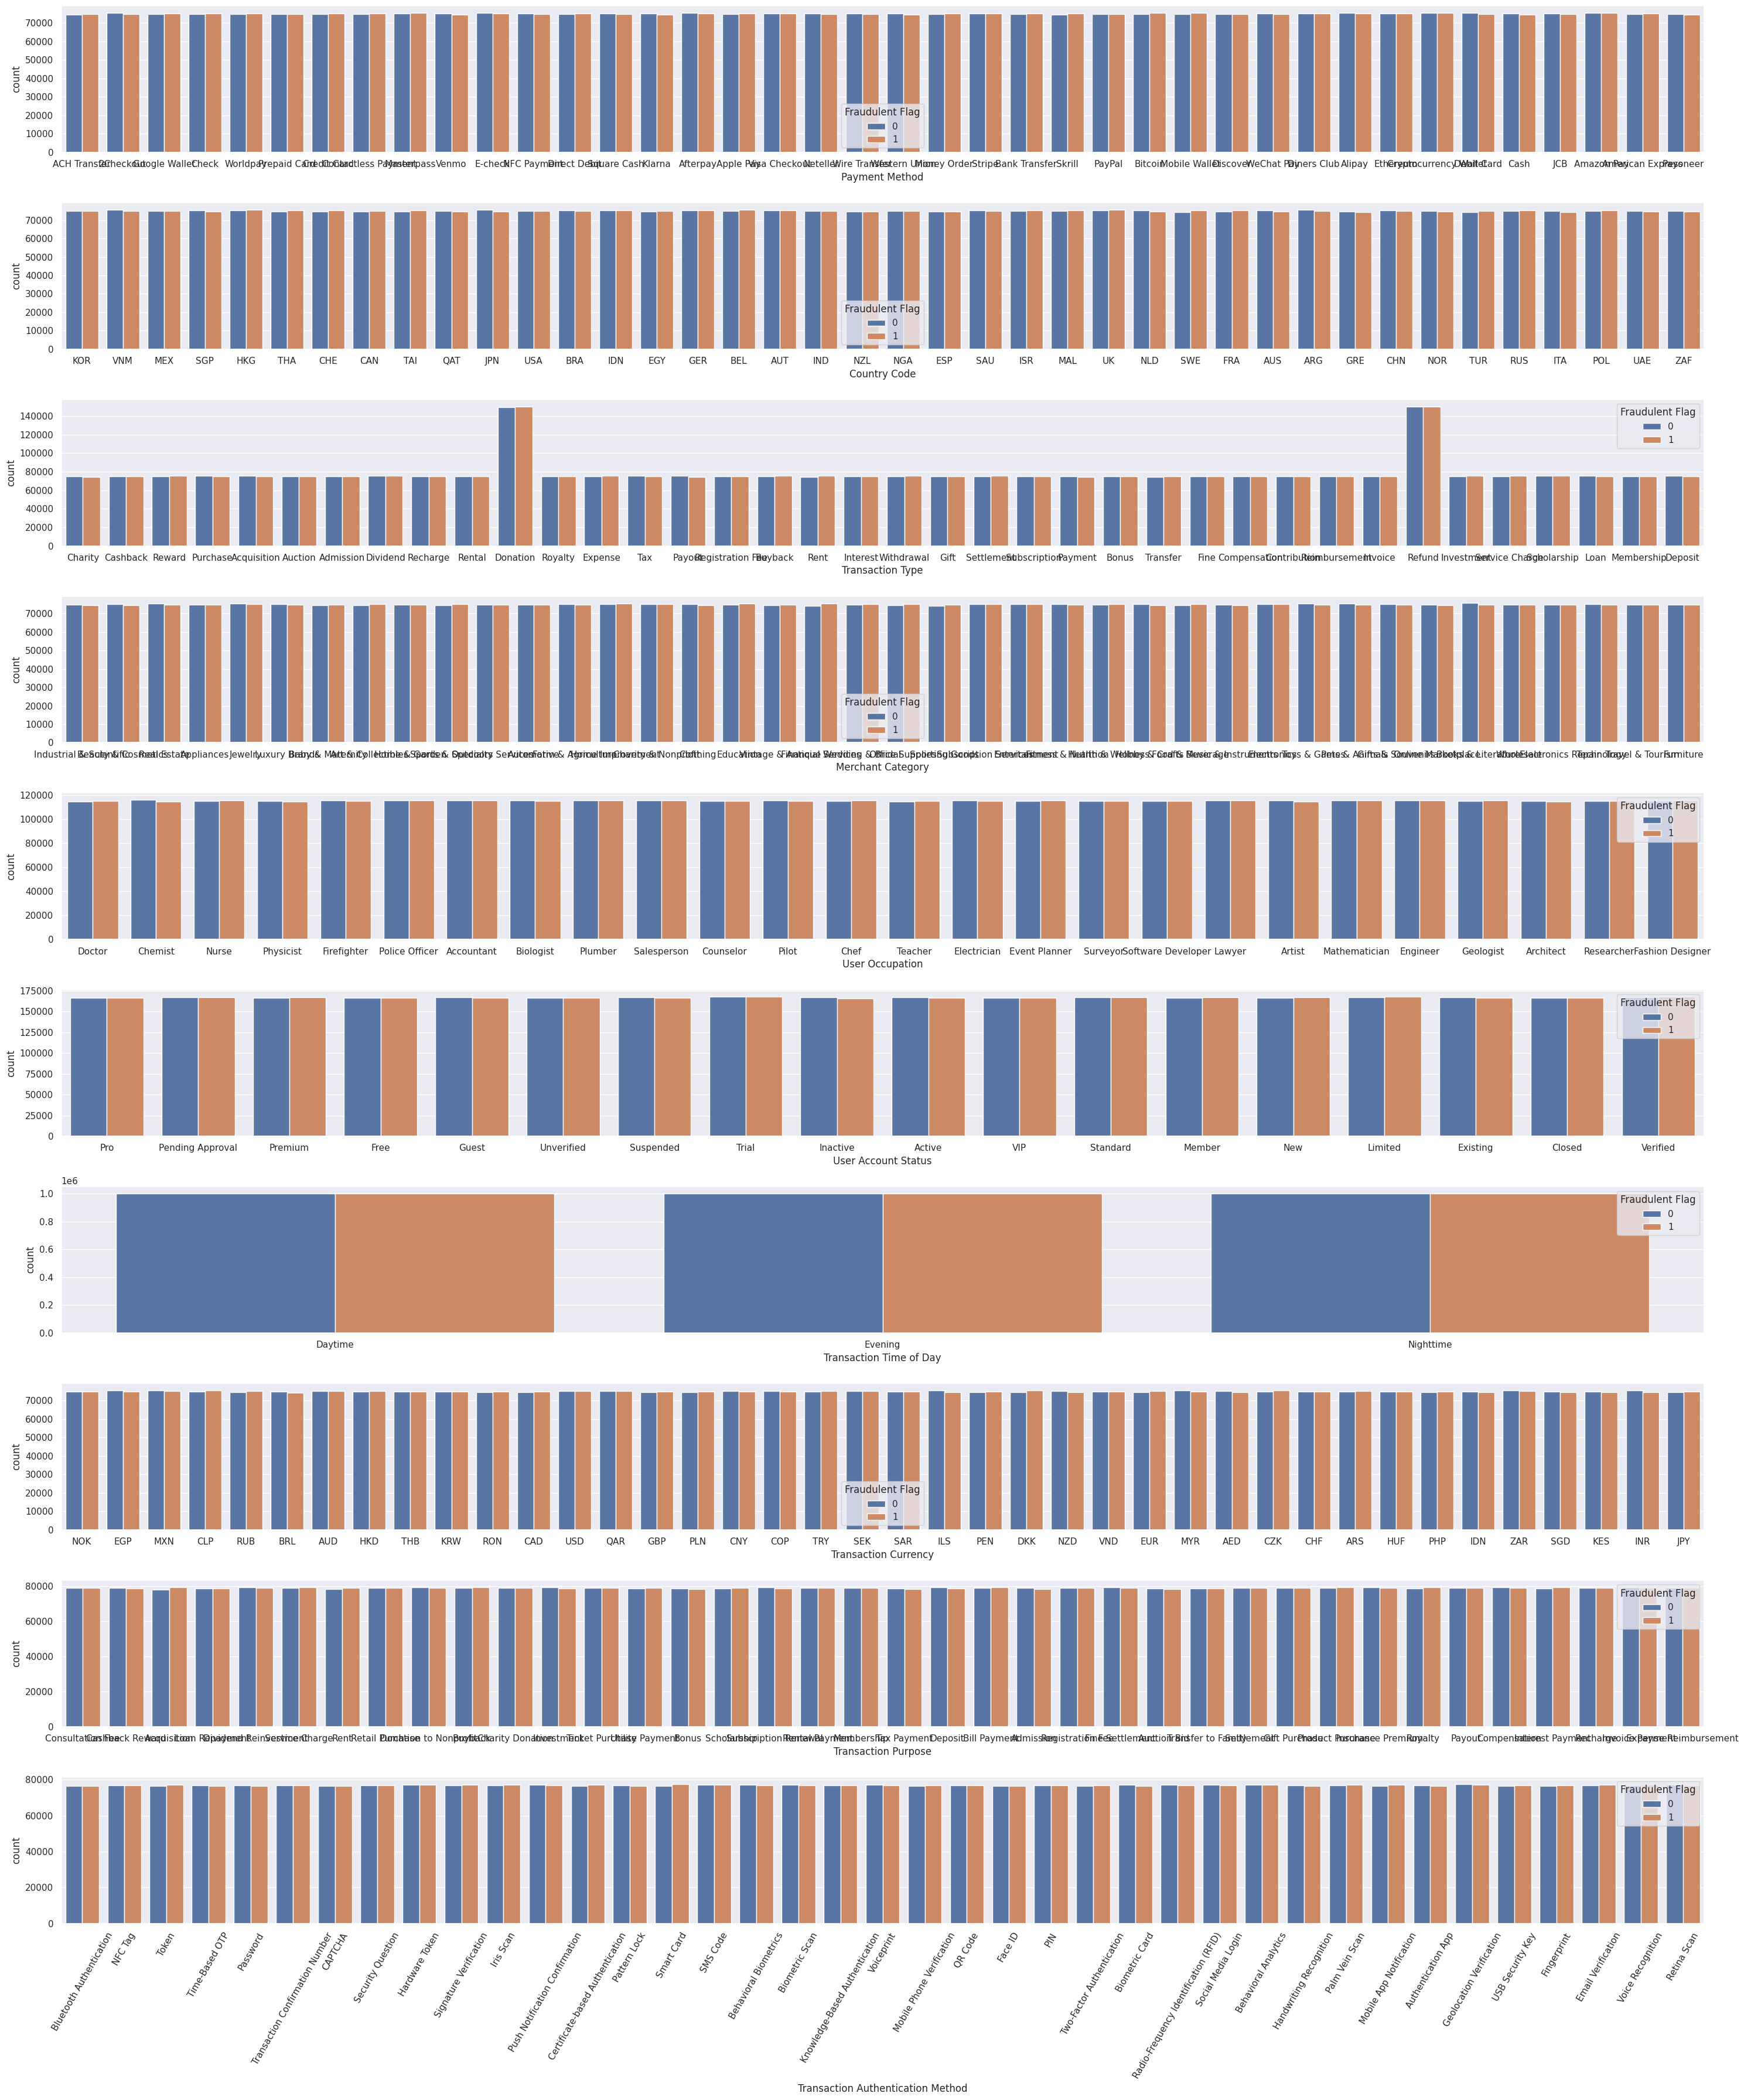

In [22]:
# Create subplots for each column
fig, ax = plt.subplots(nrows=10, figsize=[30, 36])

# Iterate through selected columns and create a count plot for each

sns.countplot(data=cat_df, x='Payment Method', hue=df['Fraudulent Flag'], ax=ax[0])
sns.countplot(data=cat_df, x='Country Code', hue=df['Fraudulent Flag'], ax=ax[1])
sns.countplot(data=cat_df, x='Transaction Type', hue=df['Fraudulent Flag'], ax=ax[2])
sns.countplot(data=cat_df, x='Merchant Category', hue=df['Fraudulent Flag'], ax=ax[3])
sns.countplot(data=cat_df, x='User Occupation', hue=df['Fraudulent Flag'], ax=ax[4])
sns.countplot(data=cat_df, x='User Account Status', hue=df['Fraudulent Flag'], ax=ax[5])
sns.countplot(data=cat_df, x='Transaction Time of Day', hue=df['Fraudulent Flag'], ax=ax[6])
sns.countplot(data=cat_df, x='Transaction Currency', hue=df['Fraudulent Flag'], ax=ax[7])
sns.countplot(data=cat_df, x='Transaction Purpose', hue=df['Fraudulent Flag'], ax=ax[8])
sns.countplot(data=cat_df, x='Transaction Authentication Method', hue=df['Fraudulent Flag'], ax=ax[9])
plt.xticks(rotation=60)
plt.tight_layout();

#### Numerical

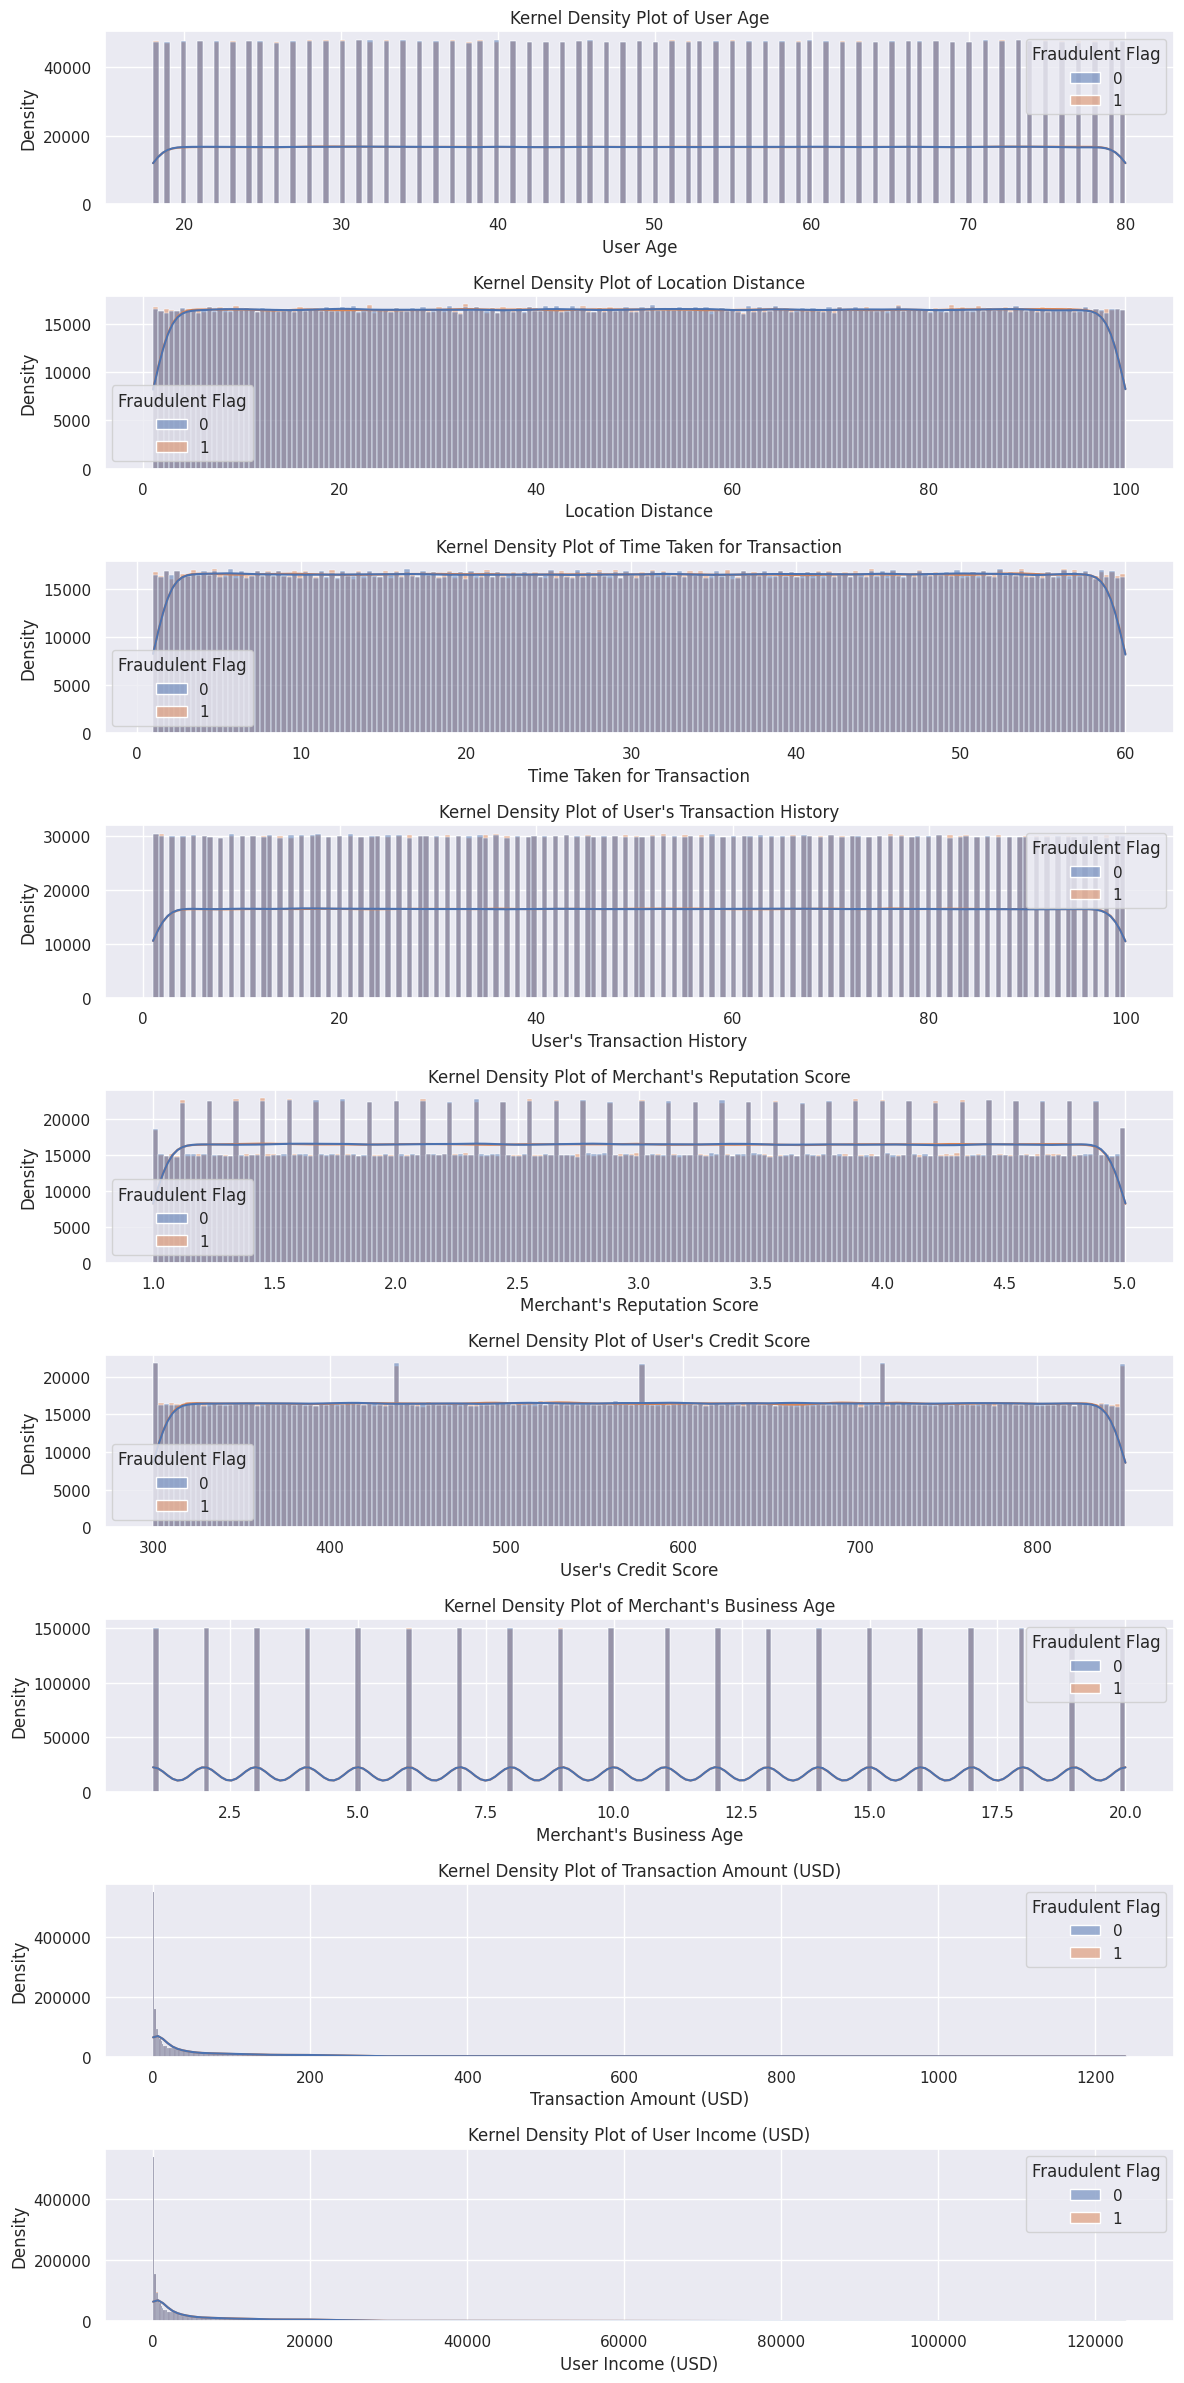

In [23]:
# Create subplots for each numerical column
fig, axs = plt.subplots(nrows=numerical_df.shape[1], figsize=[12, 24])

# Iterate through numerical columns and create a kernel density plot for each
for i, column in enumerate(numerical_df.columns):
    var = numerical_df[column]
    sns.histplot(data=numerical_df, x=var, hue=df['Fraudulent Flag'], ax=axs[i], kde=True, common_norm=False)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Density')
    axs[i].set_title(f'Kernel Density Plot of {column}')

plt.tight_layout()

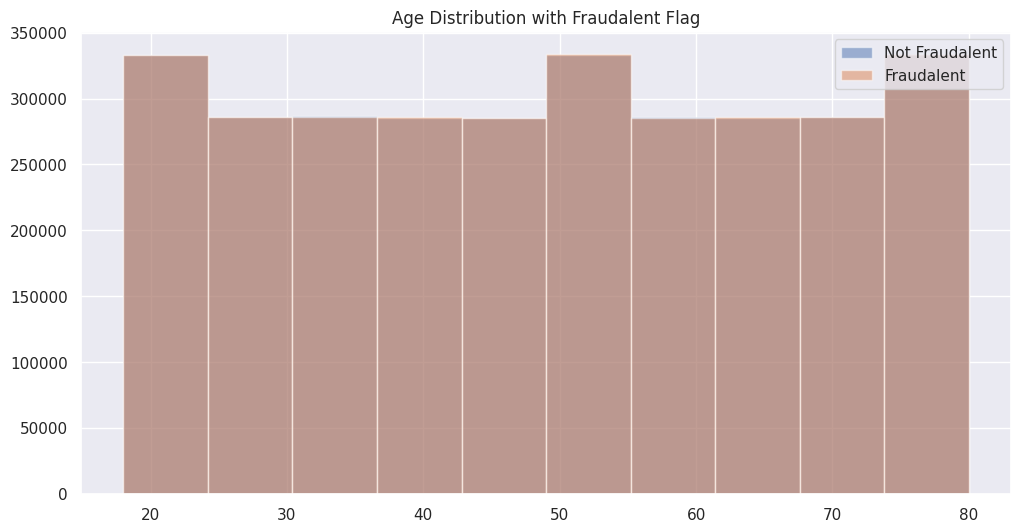

In [24]:
# Checking the Age Distribution with Fraudalent Flag
df['User Age'][df["Fraudulent Flag"] == 0].hist(alpha=0.5,label='Not Fraudalent')
df['User Age'][df["Fraudulent Flag"] == 1].hist(alpha=0.5,label='Fraudalent')
plt.title('Age Distribution with Fraudalent Flag')
plt.legend();

Text(0.5, 1.0, 'Scatter Plot between User Income (USD) and Transaction Amount (USD)')

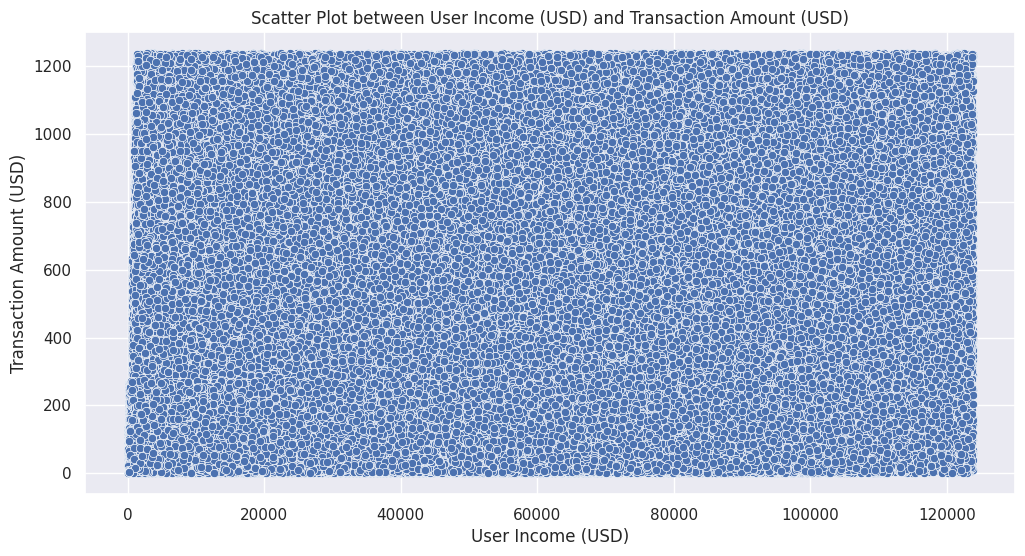

In [25]:
# Scatter Plot between User Income (USD) and Transaction Amount (USD)
sns.scatterplot(data=df, x='User Income (USD)', y='Transaction Amount (USD)')
plt.title('Scatter Plot between User Income (USD) and Transaction Amount (USD)')

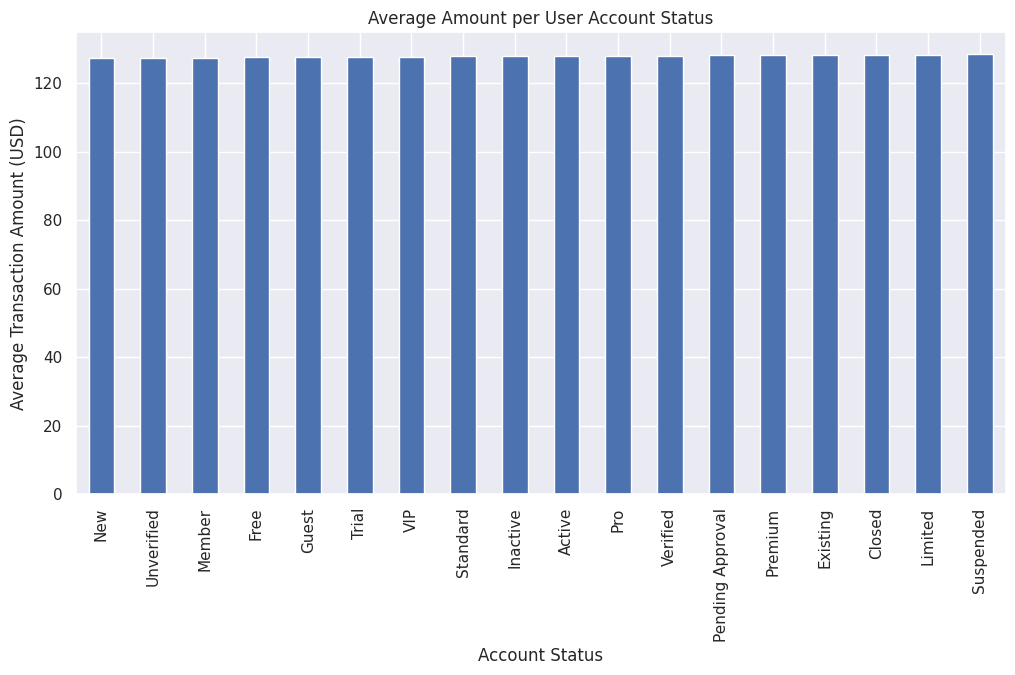

In [26]:
df.groupby('User Account Status')['Transaction Amount (USD)'].mean().sort_values().plot(
    kind="bar", title='Average Amount per User Account Status',
                    ylabel='Average Transaction Amount (USD)', xlabel='Account Status');

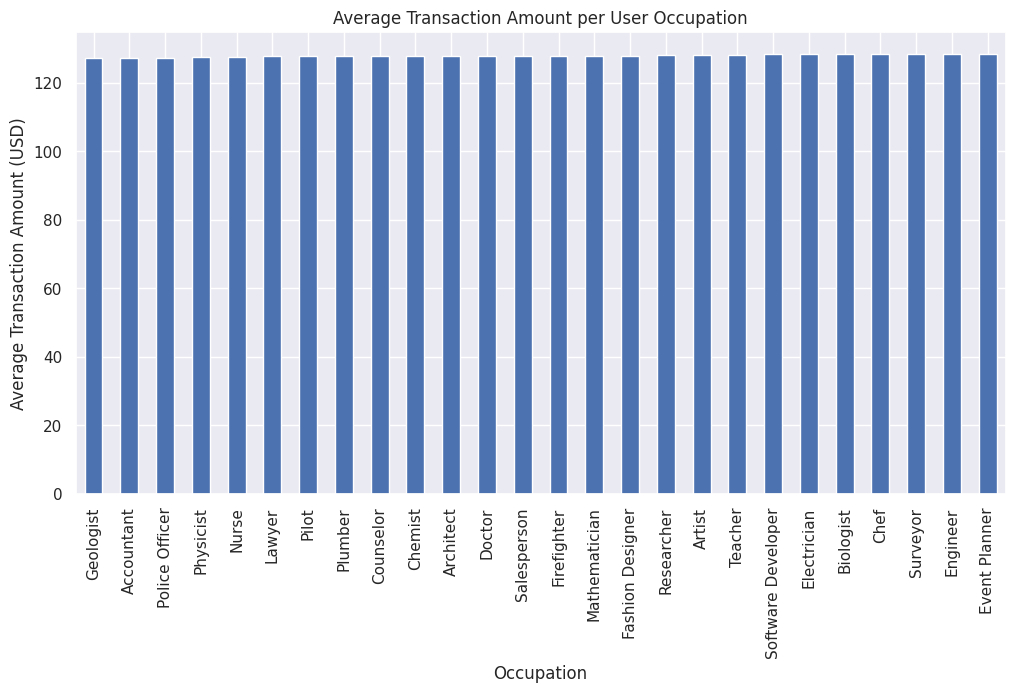

In [27]:
df.groupby('User Occupation')['Transaction Amount (USD)'].mean().sort_values().plot(
    kind="bar", title='Average Transaction Amount per User Occupation',
                    ylabel='Average Transaction Amount (USD)', xlabel='Occupation');

In [28]:
# Creating an Income to Transaction Rattio to identify high spenders
df['Transaction_to_Income'] = (df['Transaction Amount (USD)'] / df['User Income (USD)']) * 100
df.sample()

,Transaction ID,User ID,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag,Transaction Amount (USD),User Income (USD),Transaction_to_Income
1193486,79337138,7275,2022-07-20 09:55:02,6840,Skrill,NOR,Purchase,Augmented Reality Glasses,18.29.179.238,Slimjet,Raspbian,Hobby & Crafts,80,Geologist,Female,Pending Approval,Executed,5.25,26.38,Evening,53,3.1,Russia,ARS,Registration Fee,725,aim.co.uk,4,Token,1,2.68085,201.834347,1.328243


## Multivariate Analysis

<ipython-input-29-865270400017>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


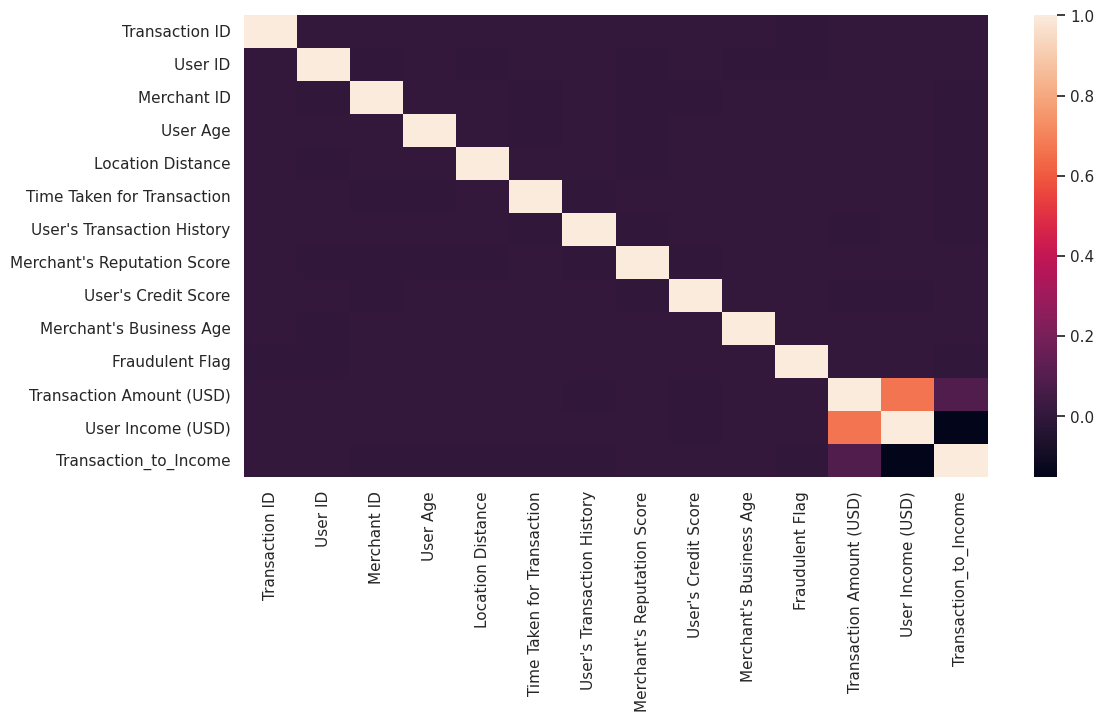

In [29]:
# Checking for multicolinearity among numerical columns
corr = df.corr()
sns.heatmap(corr);

In [30]:
df.groupby(["Fraudulent Flag", "User Gender"]).agg({'Transaction Amount (USD)': ['mean', 'min', 'max', 'sum']})

Transaction Amount (USD)            \
                                                      mean       min   
Fraudulent Flag User Gender                                            
0               Agender                         128.238969  0.000041   
                Female                          127.513407  0.000042   
                Genderqueer                     127.730814  0.000045   
                Male                            127.764208  0.000040   
                Non-Binary                      128.320085  0.000044   
                Other                           127.761998  0.000043   
                Prefer Not to Say               127.985469  0.000040   
1               Agender                         128.009766  0.000042   
                Female                          127.411333  0.000042   
                Genderqueer                     127.684551  0.000049   
                Male                            128.080680  0.000042   
                Non-Binary                      128.144374  0.000046   
                Other                           127.936076  0.000041   
                Prefer Not to Say               128.343426  0.000044   

                                                              
                                           max           sum  
Fraudulent Flag User Gender                                   
0               Agender            1238.088562  5.484563e+07  
                Female             1238.125708  5.473692e+07  
                Genderqueer        1238.200000  5.468424e+07  
                Male               1238.113326  5.479717e+07  
                Non-Binary         1238.088562  5.504983e+07  
                Other              1238.200000  5.471318e+07  
                Prefer Not to Say  1238.125708  5.489118e+07  
1               Agender            1238.162854  5.484809e+07  
                Female             1237.977124  5.448631e+07  
                Genderqueer        1238.026652  5.474181e+07  
                Male               1237.828540  5.499848e+07  
                Non-Binary         1237.989506  5.498111e+07  
                Other              1237.741866  5.479643e+07  
                Prefer Not to Say  1238.063798  5.496923e+07

In [31]:
df.groupby(["Fraudulent Flag", "Transaction Time of Day"]).agg({'Transaction Amount (USD)': ['mean', 'min', 'max', 'sum', 'count']})

Transaction Amount (USD)            \
                                                            mean       min   
Fraudulent Flag Transaction Time of Day                                      
0               Daytime                               128.189754  0.000042   
                Evening                               127.987682  0.000040   
                Nighttime                             127.529293  0.000040   
1               Daytime                               128.016276  0.000044   
                Evening                               128.050543  0.000042   
                Nighttime                             127.766675  0.000041   

                                                                             
                                                 max           sum    count  
Fraudulent Flag Transaction Time of Day                                      
0               Daytime                  1238.175236  1.281251e+08   999496  
                Evening                  1238.200000  1.279214e+08   999482  
                Nighttime                1238.200000  1.276716e+08  1001116  
1               Daytime                  1238.162854  1.279009e+08   999099  
                Evening                  1238.063798  1.281457e+08  1000743  
                Nighttime                1238.113326  1.277749e+08  1000064

## Feature Engineering

In [32]:
# Extract day of the week (0 = Monday, 6 = Sunday)
df['DayOfWeek'] = df['Transaction Date and Time'].dt.dayofweek
# Extract month
df['Month'] = df['Transaction Date and Time'].dt.month
# Extract day of the month
df['DayOfMonth'] = df['Transaction Date and Time'].dt.day

In [33]:
day_mapping = {0: 'Monday',1: 'Tuesday',2: 'Wednesday',3: 'Thursday',4: 'Friday',5: 'Saturday',6: 'Sunday'}

# Use the .map() function to create a new 'DayName' column
df['DayName'] = df['DayOfWeek'].map(day_mapping)

Friday       14.369483
Sunday       14.338717
Saturday     14.332850
Monday       14.256683
Tuesday      14.247317
Wednesday    14.234450
Thursday     14.220500
Name: DayName, dtype: float64


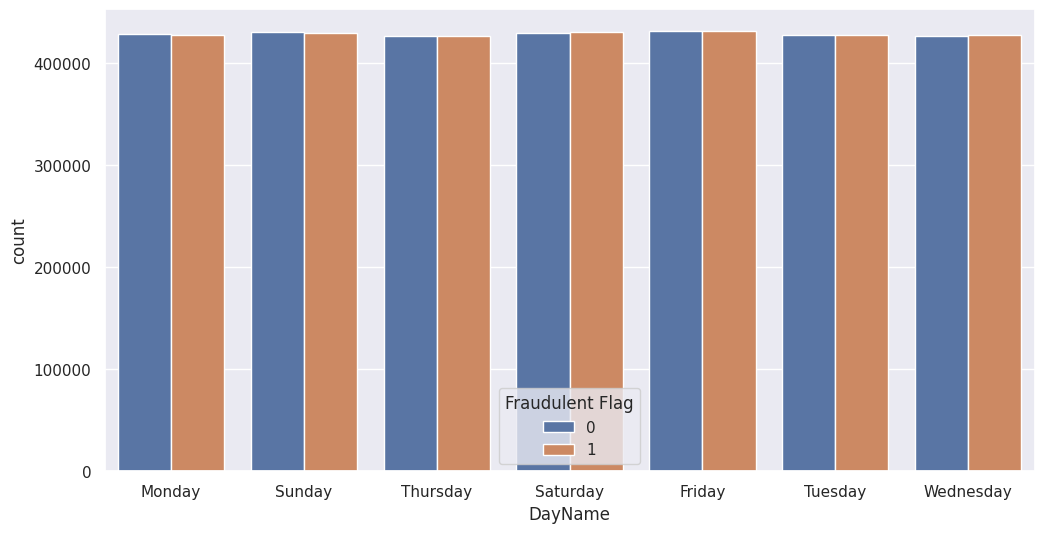

In [34]:
print(df['DayName'].value_counts(normalize=True)*100)
sns.countplot(df, x= "DayName", hue="Fraudulent Flag");

In [35]:
# Define a mapping dictionary for month names
month_mapping = {1: 'January',2: 'February',3: 'March',4: 'April',5: 'May',6: 'June',7: 'July',8: 'August',
    9: 'September',10: 'October',11: 'November',12: 'December'}
# Use the .map() function to create a new 'MonthName' column
df['MonthName'] = df['Month'].map(month_mapping)

May          9.910300
March        9.890533
January      9.874617
July         9.757467
April        9.591667
June         9.565100
February     8.915317
August       6.584767
December     6.583917
October      6.561833
November     6.389683
September    6.374800
Name: MonthName, dtype: float64


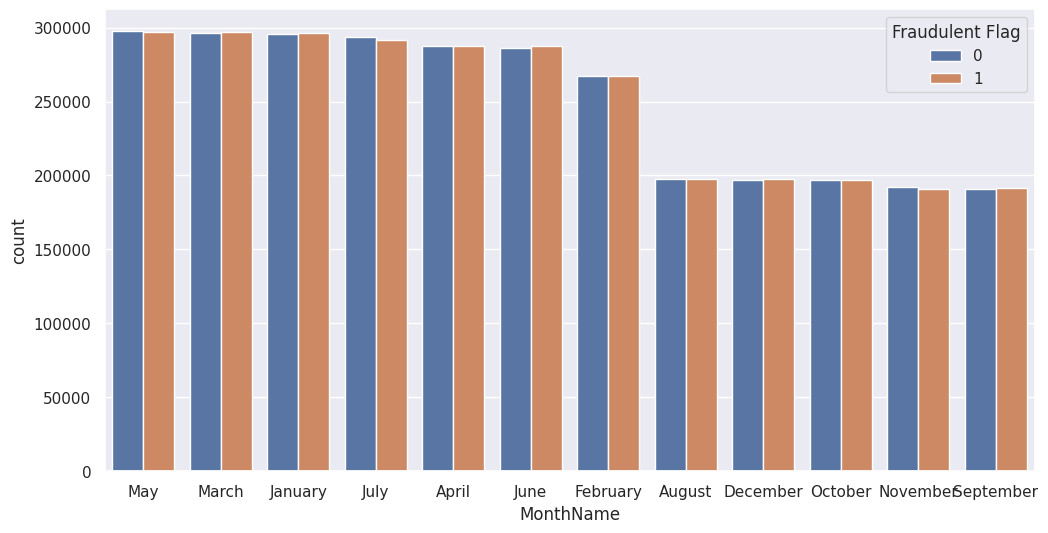

In [36]:
print(df['MonthName'].value_counts(normalize=True)*100)
sns.countplot(df, x= "MonthName", hue="Fraudulent Flag", order=df['MonthName'].value_counts().index);

In [37]:
# Loop through each categorical column and perform frequency encoding
for column in df.select_dtypes(include=['object']):
    encoding = df[column].value_counts(normalize=True).to_dict()
    df[column] = df[column].map(encoding)

In [38]:
df.head()

,Transaction ID,User ID,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag,Transaction Amount (USD),User Income (USD),Transaction_to_Income,DayOfWeek,Month,DayOfMonth,DayName,MonthName
0,51595306,9822,2023-01-02 07:47:54,4044,0.024931,0.024968,0.024896,0.026359,1.666667e-07,0.025069,0.025033,0.024938,68,0.038353,0.142864,0.055382,0.024973,9.34,24.22,0.333099,26,2.71,0.024875,0.024958,0.026320,343,0.025003,3,0.025517,0,15.099577,6187.438784,0.244036,0,1,2,Monday,January
1,85052974,4698,2021-09-12 15:15:41,4576,0.025019,0.025091,0.025039,0.026287,1.666667e-07,0.024941,0.025040,0.024938,22,0.038452,0.142808,0.055639,0.024902,65.28,55.11,0.333099,60,3.95,0.024995,0.025087,0.026285,688,0.024973,13,0.025665,1,13.904287,2884.434599,0.482046,6,9,12,Sunday,September
2,23954324,8666,2023-01-12 17:25:58,4629,0.024984,0.025019,0.025015,0.026292,1.666667e-07,0.025025,0.025077,0.025062,71,0.038498,0.143050,0.055382,0.025015,44.05,53.84,0.333099,81,3.81,0.024997,0.025118,0.026254,371,0.025036,7,0.025639,1,24.324947,3419.244241,0.711413,3,1,12,Thursday,January
3,44108303,9012,2021-02-27 11:31:00,3322,0.025014,0.025021,0.025132,0.026372,1.666667e-07,0.025078,0.025021,0.024980,78,0.038498,0.142692,0.055472,0.025012,21.70,21.62,0.333099,18,2.67,0.025068,0.025096,0.026229,687,0.025129,15,0.025606,1,0.639456,3.872420,16.513079,5,2,27,Saturday,February
4,66622683,5185,2022-09-24 04:06:38,7609,0.024960,0.025153,0.025059,0.026282,1.666667e-07,0.025017,0.024960,0.025097,31,0.038383,0.143050,0.055455,0.025021,56.63,53.71,0.333099,98,3.19,0.024874,0.025002,0.026398,605,0.025029,17,0.025604,1,9.870212,548.317640,1.800090,5,9,24,Saturday,September


In [39]:
# Drop columns
df.drop(columns=['Transaction ID', 'User ID','Merchant ID', 'Transaction Currency', 'Country Code', 'IP Address', 'Transaction Date and Time','DayName', 'MonthName'], inplace=True)

In [40]:
df.shape

(6000000, 29)